In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform

# Exercise 1 : Linear SVM - Influence of parameter C

In [2]:
dataset = pd.read_csv('LineaireNoisy2.csv', delimiter=';')
dataset

,x1,x2,y
0,10.00,5.00,1
1,9.50,10.00,-1
2,2.30,5.25,-1
3,3.40,3.88,-1
4,7.66,4.46,-1
...,...,...,...
147,15.01,15.67,1
148,16.05,14.70,1
149,15.65,18.23,1
150,18.85,17.43,1


In [3]:
print("Possible values for Y")
print(dataset.iloc[:, 2].value_counts())
print("En pourcentage")
print(dataset.iloc[:, 2].value_counts(normalize=True)* 100)

Possible values for Y
 1    76
-1    76
Name: y, dtype: int64
En pourcentage
 1    50.0
-1    50.0
Name: y, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


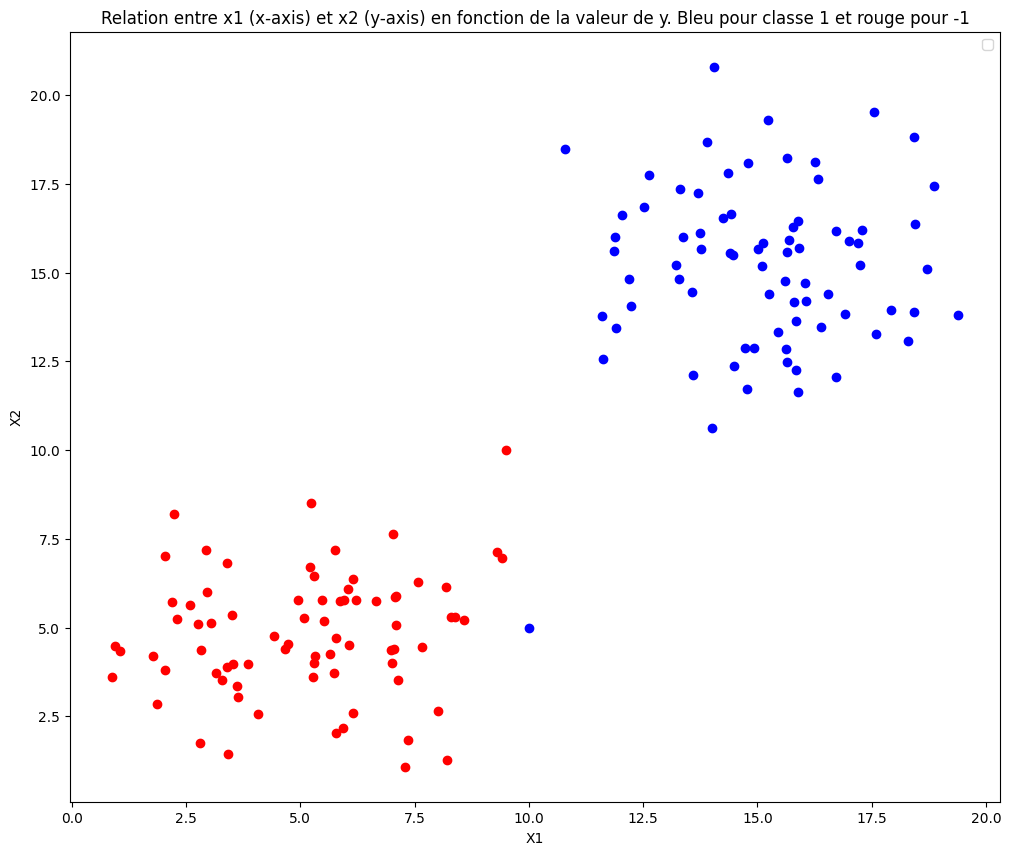

In [4]:
# Ici on regroupe les individus en fonction de la valeur de Y
class_1 = dataset[dataset['y'] == 1]
class_2 = dataset[dataset['y'] == -1]

plt.figure(figsize=(12, 10)) # creates a figure with the desired size
plt.scatter(class_1.x1, class_1.x2, marker = 'o', color = 'blue')
plt.scatter(class_2.x1, class_2.x2, marker = 'o', color = 'red')
plt.title("Relation entre x1 (x-axis) et x2 (y-axis) en fonction de la valeur de y. Bleu pour classe 1 et rouge pour -1") # gives a title to the figure
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc = 'best')

## Fitting a linear SVM to this dataset

In [5]:
from sklearn import svm

In [6]:
model_svm = svm.SVC(C = 1000, kernel = 'linear')
# here SVC stands for Support Vector Classification (there are other kinds of SVM),and we ask for a linear kernel
# The parameter C is set to 1000

In [7]:
model_svm.fit(dataset.iloc[:,0:2], dataset.y)
# here we ask to fit the model using the features (x1 and x2) and the target (y)

SVC(C=1000, kernel='linear')

In [8]:
model_svm.support_vectors_
# the support vectors found by the SVC. Here 3 support vectors, called sv1, sv2 and sv3

array([[ 9.41,  6.97],
       [10.  ,  5.  ],
       [10.78, 18.49]])

In [9]:
indice_support = model_svm.support_
indice_support
# the index of the support vectors in the dataset. you can check 

array([ 61,   0, 102], dtype=int32)

In [10]:
model_svm.dual_coef_
# the lagrange coefficients associated to the support vectors (w1, w2 and w3)

array([[-4.04838982,  3.46935572,  0.5790341 ]])

In [11]:
model_svm.intercept_
# the constant of the model (w0)

array([-26.58177221])

In [12]:
decisions = model_svm.decision_function(dataset.iloc[:,0:2])
decisions

array([  0.99940407,  -1.24148389, -20.91114918, -17.56203656,
        -5.55801067, -10.10889154,  -3.90822106, -21.76685665,
       -10.39666304, -18.76130279, -13.09448448, -15.41565599,
       -22.18728362,  -3.62255982, -16.27032034, -17.78695937,
        -7.43350422, -17.49256868, -17.13473082,  -7.38326661,
       -19.5516331 , -12.85908729, -16.87859157, -18.21741848,
        -4.32685023, -10.06558557,  -6.0540296 , -12.56078853,
       -12.99192542, -11.72582313,  -7.3553862 , -12.18372041,
        -7.47457014, -24.64741494, -10.16024918, -18.04301931,
       -14.80785344, -21.27232307,  -1.34003152, -17.23762877,
        -7.28068112, -13.86615894, -19.43865014, -10.60139177,
        -7.27870065, -10.47191611,  -5.97833429, -10.88212828,
        -3.49899913, -12.14974236,  -4.26845759, -20.12147022,
       -11.9679693 , -11.42929574, -14.07039256, -24.64824895,
        -6.91064799, -19.1329775 , -16.77089868,  -8.609971  ,
        -9.54137378,  -0.99970304, -10.91975481,  -7.86

In [13]:
for indice in indice_support:
    h = decisions[indice]
    print(f"h_support_indice_{indice} = {h} ")

print('yes is expected')

h_support_indice_61 = -0.9997030442377621 
h_support_indice_0 = 0.9994040735050476 
h_support_indice_102 = 1.0002669063476475 
yes is expected


In [14]:
score = model_svm.score(dataset.iloc[:,0:2], dataset.y)
print(f"Le score = {score}")

Le score = 1.0


In [15]:
def svm_draw(model_svm, xmin, xmax, dataset):
    
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))


    plt.figure(figsize=(10, 8))
    # Plotting our two-features-space
    plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c = dataset.y, cmap = color_map, marker='+')
    # Constructing a hyperplane using a formula.
    w = model_svm.coef_[0]           # w consists of 2 elements
    b = model_svm.intercept_[0]      # b consists of 1 element
    x_points = np.linspace(xmin, xmax)    # generating x-points from -1 to 1
    y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points

    plt.plot(x_points, y_points, c='g');

    plt.scatter(model_svm.support_vectors_[:, 0],
                model_svm.support_vectors_[:, 1], 
                s=50, 
                facecolors='none', 
                edgecolors='k', 
                alpha=1);

    # Step 2 (unit-vector):
    w_hat = model_svm.coef_[0] / (np.sqrt(np.sum(model_svm.coef_[0] ** 2)))
    # Step 3 (margin):
    margin = 1 / np.sqrt(np.sum(model_svm.coef_[0] ** 2))
    # Step 4 (calculate points of the margin lines):
    decision_boundary_points = np.array(list(zip(x_points, y_points)))
    points_of_line_above = decision_boundary_points + w_hat * margin
    points_of_line_below = decision_boundary_points - w_hat * margin
    # Plot margin lines
    # Blue margin line above
    plt.plot(points_of_line_above[:, 0], 
             points_of_line_above[:, 1], 
             'g--', 
             linewidth=2)
    # Green margin line below
    plt.plot(points_of_line_below[:, 0], 
             points_of_line_below[:, 1], 
             'g--',
             linewidth=2)

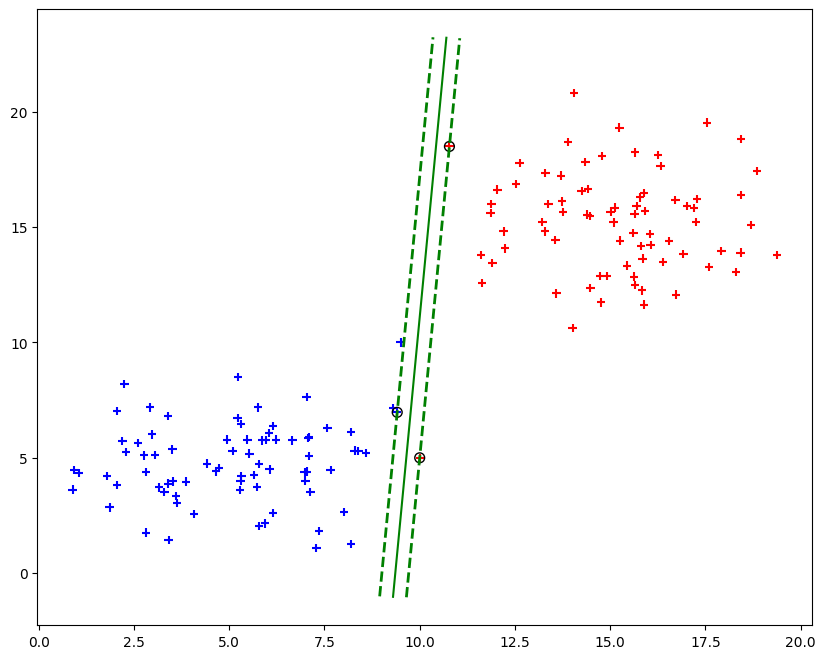

In [16]:
svm_draw(model_svm, 9.3, 10.7, dataset)

In [17]:
model_svm_1 = svm.SVC(C = 1, kernel = 'linear').fit(dataset.iloc[:,0:2], dataset.y)

In [18]:
supports = model_svm_1.support_vectors_
indice_supports = model_svm_1.support_

print(f"there are {len(indice_supports)} for this model ")
print(f"vectors support for this model : {supports} ")
print(f"indice of vectors support : {indice_supports} ")

there are 4 for this model 
vectors support for this model : [[ 9.5  10.  ]
 [ 9.41  6.97]
 [10.    5.  ]
 [10.78 18.49]] 
indice of vectors support : [  1  61   0 102] 


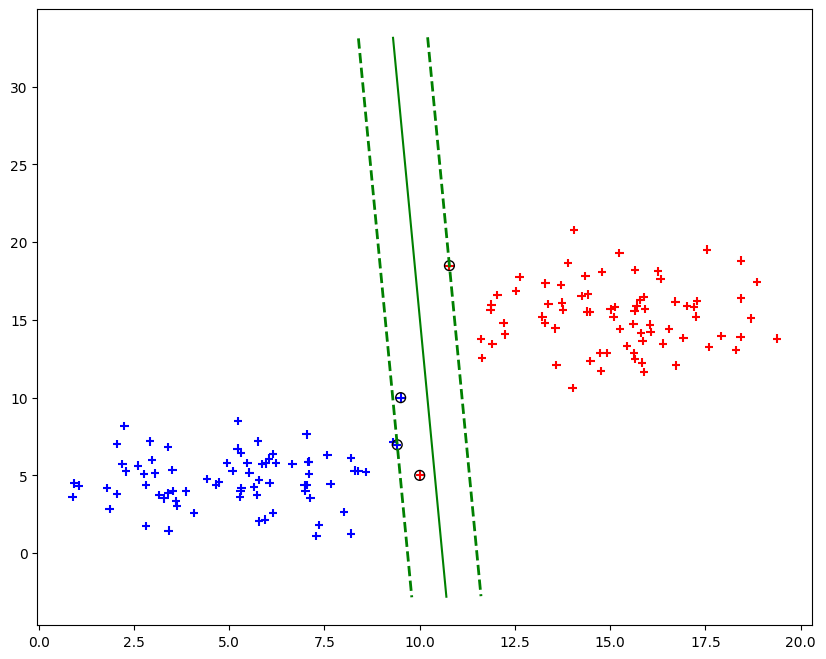

In [19]:
svm_draw(model_svm_1, 9.3, 10.7, dataset)

In [20]:
print("On a deux points sur la marge et 2 autres dans la marge")
print("On a 1 seul point qui est mal placé.")
print("Valeur des h des vecteurs support : ")

decisions_1 = model_svm_1.decision_function(dataset.iloc[:,0:2])
for indice in indice_supports:
    h = decisions_1[indice]
    print(f"h_support_indice_{indice} = {h} ")

On a deux points sur la marge et 2 autres dans la marge
On a 1 seul point qui est mal placé.
Valeur des h des vecteurs support : 
h_support_indice_1 = -0.7712497694552205 
h_support_indice_61 = -0.9999940580628071 
h_support_indice_0 = -0.4355364352112012 
h_support_indice_102 = 0.9999944997884178 


In [21]:
model_svm_2 = svm.SVC(C = 0.01, kernel = 'linear').fit(dataset.iloc[:,0:2], dataset.y)

In [22]:
supports = model_svm_2.support_vectors_
indice_supports = model_svm_2.support_

print(f"there are {len(indice_supports)} for this model ")
print(f"vectors support for this model : {supports} ")
print(f"indice of vectors support : {indice_supports} ")

there are 12 for this model 
vectors support for this model : [[ 9.5  10.  ]
 [ 5.24  8.5 ]
 [ 8.19  6.13]
 [ 9.3   7.14]
 [ 9.41  6.97]
 [ 7.03  7.64]
 [10.    5.  ]
 [11.61 13.78]
 [14.01 10.63]
 [11.91 13.44]
 [11.63 12.56]
 [13.59 12.12]] 
indice of vectors support : [  1  10  24  38  61  63   0  87  93 106 120 129] 


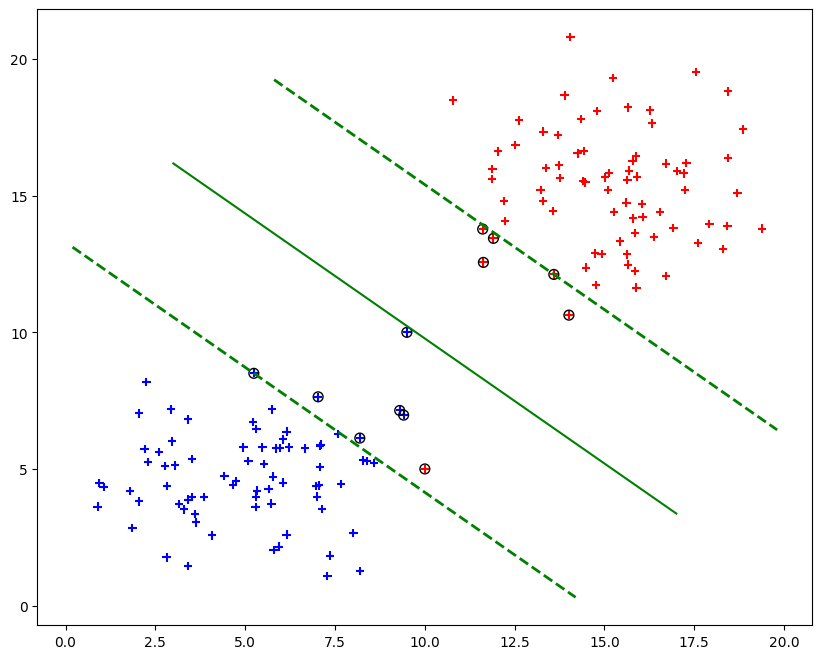

In [23]:
svm_draw(model_svm_2, 3, 17, dataset)

In [24]:
print("On a 10 points sur la marge et 2 autres dans la marge")
print("On a 1 seul point qui est mal placé.")
print("Valeur des h des vecteurs support : ")

decisions = model_svm_2.decision_function(dataset.iloc[:,0:2])
for indice in indice_supports:
    h = decisions[indice]
    print(f"h_support_indice_{indice} = {h} ")

On a 10 points sur la marge et 2 autres dans la marge
On a 1 seul point qui est mal placé.
Valeur des h des vecteurs support : 
h_support_indice_1 = -0.041231222131473455 
h_support_indice_10 = -1.0000001334355244 
h_support_indice_24 = -0.9413556385389343 
h_support_indice_38 = -0.5815916640424228 
h_support_indice_61 = -0.5938995221381709 
h_support_indice_63 = -0.86176782035208 
h_support_indice_0 = -0.8478167088246971 
h_support_indice_87 = 0.9729423364336944 
h_support_indice_93 = 0.8036855338174935 
h_support_indice_106 = 0.9613296726738754 
h_support_indice_120 = 0.759556585830166 
h_support_indice_129 = 1.0000001687397764 


Lorsque C est élevé, nous n'avons pas beaucoup de points sélectionnés comme vecteur support parce que le coût d'une erreur est important, mais lorsque C est court, nous avons beaucoup de points sélectionnés comme vecteur support parce que le coût des erreurs n'est pas important.

When C is high, we don't have many points selected as support vectors because the cost of an error is high, but when C is low, we have many points selected as support vectors because the cost of errors is not high.

# Exercise 2: Choosing C using train/val/test split

In [25]:
# Load the dataset
dataset = pd.read_csv("spam7.csv", decimal=",", index_col=0, delimiter = ";")
dataset
# A description about this dataset is given here:
# http://math.furman.edu/~dcs/courses/math47/R/library/DAAG/html/spam7.html

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [26]:
print(f"Examples are available in this dataset : {len(dataset)}")
liste = dataset.columns.to_list()
liste.pop()
print(f"Features : {liste}")
print("Distribution of the target variable")
print(dataset.iloc[:, 6].value_counts())
print("En pourcentage")
print(dataset.iloc[:, 6].value_counts(normalize=True)* 100)

Examples are available in this dataset : 4601
Features : ['crl.tot', 'dollar', 'bang', 'money', 'n000', 'make']
Distribution of the target variable
n    2788
y    1813
Name: yesno, dtype: int64
En pourcentage
n    60.595523
y    39.404477
Name: yesno, dtype: float64


In [ ]:
dataset

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [28]:
from sklearn.preprocessing import StandardScaler
# First, get the features
X = dataset.iloc[:,0:6]
# then create a scaler on X
scaler = StandardScaler().fit(X)
# Apply it to X
X = scaler.transform(X)
# create a dataframe with X
X = pd.DataFrame(X, columns=dataset.columns[0:6])
X
# You should see that the features have been transformed
print(X.dollar.mean())
# the mean of feature 'dollar' is now 0 (very close to 0)
# it is the same for the other features

-2.470915838331146e-17


In [29]:
# Now we will add the target variable inside X
X['yesno'] = dataset.yesno
X
# now our dataset is called X

,crl.tot,dollar,bang,money,n000,make,yesno
0,-0.008724,-0.308355,0.624007,-0.212994,-0.290209,-0.342434,y
1,1.228324,0.423783,0.126203,0.758565,0.937491,0.345359,y
2,3.258733,0.440053,0.008496,-0.077428,3.021726,-0.145921,y
3,-0.152222,-0.308355,-0.161934,-0.212994,-0.290209,-0.342434,y
4,-0.152222,-0.308355,-0.164387,-0.212994,-0.290209,-0.342434,y
...,...,...,...,...,...,...,...
4596,-0.322110,-0.308355,-0.329912,-0.212994,-0.290209,0.672880,n
4597,-0.444165,-0.308355,0.102907,-0.212994,-0.290209,-0.342434,n
4598,-0.272628,-0.308355,-0.329912,-0.212994,-0.290209,0.640128,n
4599,-0.338604,-0.308355,-0.329912,-0.212994,-0.290209,2.801763,n


In [30]:
data_train, data_test = train_test_split(X, test_size = 0.3, random_state = 20)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 20)



Taille données entrainement : 3220
Taille données validation : 690
Taille données test : 691


In [31]:
model_svm = svm.SVC(C = 1, kernel = 'linear').fit(data_train.iloc[:, 0:6], data_train.yesno)

In [32]:
supports = model_svm.support_vectors_
indice_supports = model_svm.support_

print(f"there are {len(indice_supports)} for this model ")
print(f"vectors support for this model : {supports} ")
print(f"indice of vectors support : {indice_supports} ")

there are 1356 for this model 
vectors support for this model : [[ 4.75803493 -0.30835494 -0.31029443 -0.14521117 -0.2902092  -0.30968165]
 [ 0.59000719  0.20007423 -0.32991229 -0.21299439 -0.03324868 -0.34243371]
 [-0.34685064 -0.30835494 -0.16683876 -0.21299439 -0.2902092  -0.34243371]
 ...
 [-0.1670663  -0.30835494 -0.32991229 -0.21299439 -0.2902092  -0.34243371]
 [-0.20830124  0.32616466 -0.32991229  0.51002661 -0.2902092  -0.34243371]
 [-0.43756751 -0.30835494  0.61910211 -0.21299439 -0.2902092  -0.34243371]] 
indice of vectors support : [   4   10   17 ... 3208 3211 3212] 


In [33]:
score_train = model_svm.score(data_train.iloc[:, 0:6], data_train.yesno)
score_valid = model_svm.score(data_valid.iloc[:, 0:6], data_valid.yesno)
print(f"Le score train = {score_train}")
print(f"Le score valid = {score_valid}")

Le score train = 0.8350931677018634
Le score valid = 0.8536231884057971


In [34]:
c_lists = [0.01, 0.1, 1, 1.8, 3, 8, 10, 25, 100, 500, 700, 800, 1000]
score_trains = []
score_valids = []
for c in c_lists :
    model = svm.SVC(C = c, kernel = 'linear').fit(data_train.iloc[:, 0:6], data_train.yesno)
    score_t = model.score(data_train.iloc[:, 0:6], data_train.yesno)
    score_v = model.score(data_valid.iloc[:, 0:6], data_valid.yesno)
    score_trains.append(score_t)
    score_valids.append(score_v)
    print(f"Model avec C = {c}")
    print(f"Score train = {score_t}")
    print(f"Score valid = {score_v}")

print()
print("Meilleur model")

best_perf = max(score_valids)
indice_best_perf = score_valids.index(best_perf)
c = c_lists[indice_best_perf]

print(f"Meilleur performance = {best_perf}")
print(f"Valeur de C de cette performance = {c}")

model = svm.SVC(C = c, kernel = 'linear').fit(data_train.iloc[:, 0:6], data_train.yesno)

score_test = model.score(data_test.iloc[:, 0:6], data_test.yesno)
print()
print(f"Performance de ce model sur l'ensemble test : {score_test} ")
print(f"Estimation de l'erreur de généralisation : {1-score_test} ")

Model avec C = 0.01
Score train = 0.8142857142857143
Score valid = 0.8188405797101449
Model avec C = 0.1
Score train = 0.834472049689441
Score valid = 0.8507246376811595
Model avec C = 1
Score train = 0.8350931677018634
Score valid = 0.8536231884057971
Model avec C = 1.8
Score train = 0.8350931677018634
Score valid = 0.8536231884057971
Model avec C = 3
Score train = 0.8350931677018634
Score valid = 0.8536231884057971
Model avec C = 8
Score train = 0.8350931677018634
Score valid = 0.8536231884057971
Model avec C = 10
Score train = 0.8350931677018634
Score valid = 0.8536231884057971
Model avec C = 25
Score train = 0.8350931677018634
Score valid = 0.8536231884057971
Model avec C = 100
Score train = 0.8350931677018634
Score valid = 0.8536231884057971
Model avec C = 500
Score train = 0.8350931677018634
Score valid = 0.8536231884057971
Model avec C = 700
Score train = 0.8350931677018634
Score valid = 0.8536231884057971
Model avec C = 800
Score train = 0.8350931677018634
Score valid = 0.85362

KeyboardInterrupt: 

# Exercise 3: Non-linear SVM

In [ ]:
# Load a dataset
dataset = pd.read_csv("SepNonLineaire.csv")
dataset


,x1,x2,y
0,1.5,4.0,1
1,1.0,2.0,1
2,0.0,0.0,1
3,1.0,4.0,1
4,0.5,3.0,1
...,...,...,...
145,-2.8,-3.3,0
146,-2.8,1.0,0
147,-2.8,3.0,0
148,-2.4,3.0,0


In [ ]:
print(f"Examples are available in this dataset : {len(dataset)}")
liste = dataset.columns.to_list()
liste.pop()
print(f"Features : {liste}")
print("Distribution of the target variable")
print(dataset.iloc[:, 2].value_counts())
print("En pourcentage")
print(dataset.iloc[:, 2].value_counts(normalize=True)* 100)

Examples are available in this dataset : 150
Features : ['x1', 'x2']
Distribution of the target variable
y
0    105
1     45
Name: count, dtype: int64
En pourcentage
y
0    70.0
1    30.0
Name: proportion, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


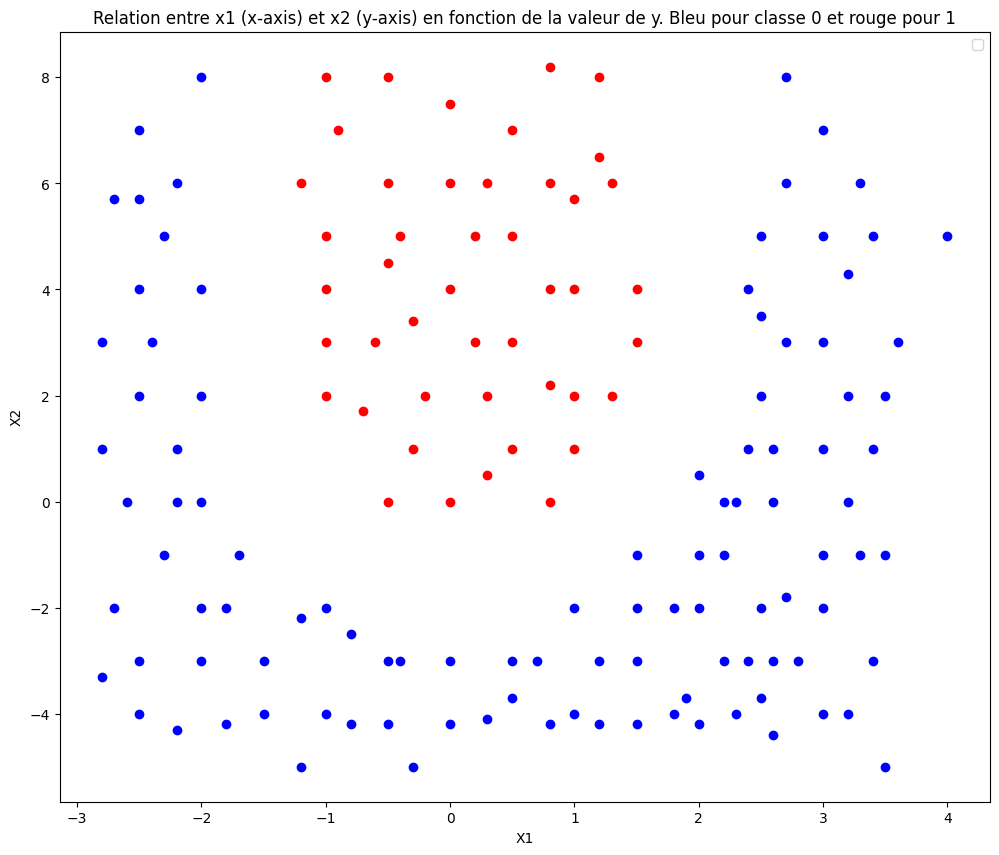

In [ ]:
# Ici on regroupe les individus en fonction de la valeur de Y
class_0 = dataset[dataset['y'] == 0]
class_1 = dataset[dataset['y'] == 1]

plt.figure(figsize=(12, 10)) # creates a figure with the desired size
plt.scatter(class_0.x1, class_0.x2, marker = 'o', color = 'blue')
plt.scatter(class_1.x1, class_1.x2, marker = 'o', color = 'red')
plt.title("Relation entre x1 (x-axis) et x2 (y-axis) en fonction de la valeur de y. Bleu pour classe 0 et rouge pour 1") # gives a title to the figure
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc = 'best')

In [ ]:
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 20)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 20)

print(f"Taille données entrainement : {len(data_train)}")
print(f"Taille données validation : {len(data_valid)}")
print(f"Taille données test : {len(data_test)}")

Taille données entrainement : 105
Taille données validation : 22
Taille données test : 23


In [ ]:
def draw_boundary(model, data, x_min, x_max, y_min, y_max):
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)
    

In [ ]:
model_svm = svm.SVC(C = 1, kernel = 'rbf', gamma = 10).fit(data_train.iloc[:, 0:2], data_train.y)

In [ ]:
score_train = model_svm.score(data_train.iloc[:, 0:2], data_train.y)
score_valid = model_svm.score(data_valid.iloc[:, 0:2], data_valid.y)
print(f"Le score train = {score_train}")
print(f"Le score valid = {score_valid}")

Le score train = 1.0
Le score valid = 0.7727272727272727


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


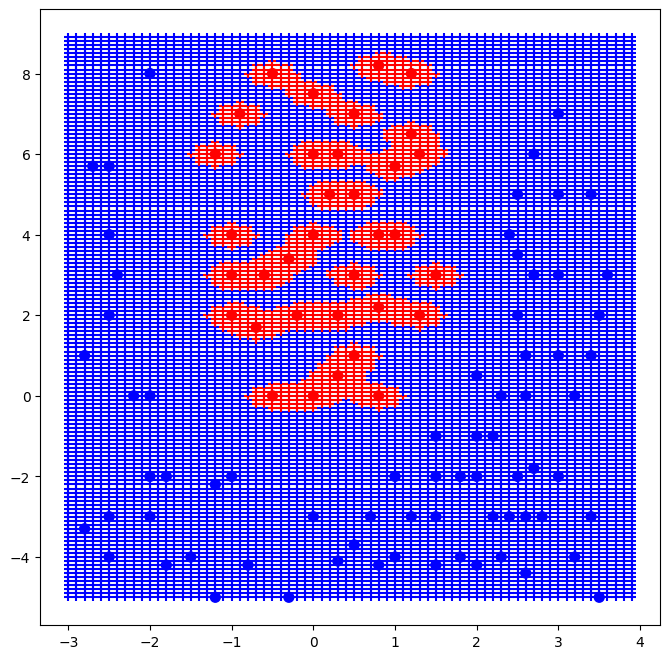

In [ ]:
draw_boundary(model_svm, data_train, -3,4,-5,9)

On remarque que le modèle est en sur-apprentissage, qu'il traitre  la frontière point par point.

In [ ]:
c_lists = [0.01, 0.1, 1, 3, 25, 500, 700, 1000]
gamma_lists = [0.01, 0.05, 0.1, 0.3, 0.5, 0.9, 1, 2]
couple_c_gamma = []
score_trains = []
score_valids = []

for c in c_lists :
    print(f"Model avec C = {c}")
    for g in gamma_lists :
        couple_c_gamma.append((c, g))
        model = svm.SVC(C = c, kernel = 'rbf', gamma = g).fit(data_train.iloc[:, 0:2], data_train.y)
        score_t = model.score(data_train.iloc[:, 0:2], data_train.y)
        score_v = model.score(data_valid.iloc[:, 0:2], data_valid.y)
        score_trains.append(score_t)
        score_valids.append(score_v)
        print(f"Pour gamma = {g}")
        print(f"Score train = {score_t}")
        print(f"Score valid = {score_v}")
    print()


print()
print("Meilleur model")

best_perf = max(score_valids)
indice_best_perf = score_valids.index(best_perf)
couple = couple_c_gamma[indice_best_perf]

print(f"Meilleur performance = {best_perf}")
print(f"Valeur du couple (c, gamma) de cette performance = {couple}")

model = svm.SVC(C = couple[0], kernel = 'rbf', gamma = couple[1]).fit(data_train.iloc[:, 0:2], data_train.y)
score_test = model.score(data_test.iloc[:, 0:2], data_test.y)
print()
print(f"Performance de ce model sur l'ensemble test : {score_test} ")
print(f"Estimation de l'erreur de généralisation : {1-score_test} ")

Model avec C = 0.01
Pour gamma = 0.01
Score train = 0.6761904761904762
Score valid = 0.7727272727272727
Pour gamma = 0.05
Score train = 0.6761904761904762
Score valid = 0.7727272727272727
Pour gamma = 0.1
Score train = 0.6761904761904762
Score valid = 0.7727272727272727
Pour gamma = 0.3
Score train = 0.6761904761904762
Score valid = 0.7727272727272727
Pour gamma = 0.5
Score train = 0.6761904761904762
Score valid = 0.7727272727272727
Pour gamma = 0.9
Score train = 0.6761904761904762
Score valid = 0.7727272727272727
Pour gamma = 1
Score train = 0.6761904761904762
Score valid = 0.7727272727272727
Pour gamma = 2
Score train = 0.6761904761904762
Score valid = 0.7727272727272727

Model avec C = 0.1
Pour gamma = 0.01
Score train = 0.6761904761904762
Score valid = 0.7727272727272727
Pour gamma = 0.05
Score train = 0.8380952380952381
Score valid = 0.8181818181818182
Pour gamma = 0.1
Score train = 0.9333333333333333
Score valid = 0.9090909090909091
Pour gamma = 0.3
Score train = 0.83809523809523

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


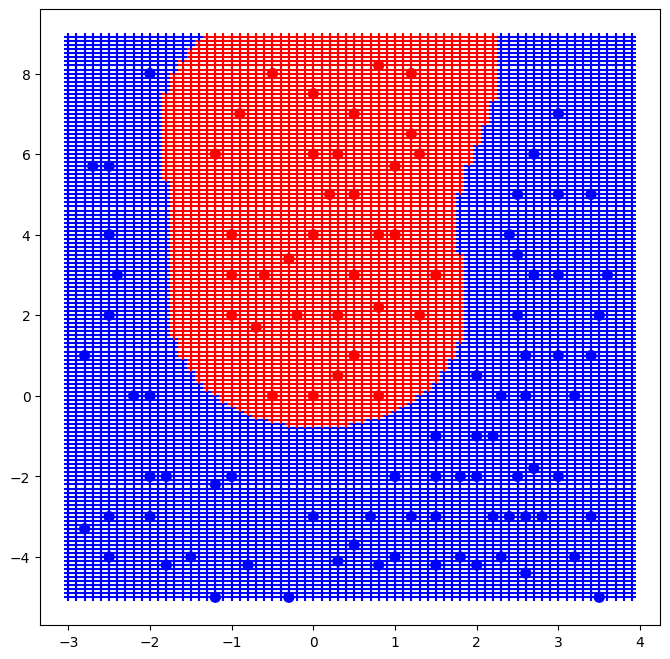

In [ ]:
draw_boundary(model, data_train, -3,4,-5,9)

In [ ]:
c_lists = [0.01, 0.1, 1, 3, 25, 500, 700, 1000]
degrees = range(1, 11)
couple_c_degree = []
score_trains = []
score_valids = []

for c in c_lists :
    print(f"Model avec C = {c}")
    for d in degrees :
        couple_c_degree.append((c, d))
        model = svm.SVC(C = c, kernel = 'poly', degree= d).fit(data_train.iloc[:, 0:2], data_train.y)
        score_t = model.score(data_train.iloc[:, 0:2], data_train.y)
        score_v = model.score(data_valid.iloc[:, 0:2], data_valid.y)
        score_trains.append(score_t)
        score_valids.append(score_v)
        print(f"Pour degree = {d}")
        print(f"Score train = {score_t}")
        print(f"Score valid = {score_v}")
    print()


print()
print("Meilleur model")

best_perf = max(score_valids)
indice_best_perf = score_valids.index(best_perf)
couple = couple_c_degree[indice_best_perf]

print(f"Meilleur performance = {best_perf}")
print(f"Valeur du couple (c, degree) de cette performance = {couple}")

model = svm.SVC(C = couple[0], kernel = 'poly', degree = couple[1]).fit(data_train.iloc[:, 0:2], data_train.y)
score_test = model.score(data_test.iloc[:, 0:2], data_test.y)
print()
print(f"Performance de ce model sur l'ensemble test : {score_test} ")
print(f"Estimation de l'erreur de généralisation : {1-score_test} ")

Model avec C = 0.01
Pour degree = 1
Score train = 0.6761904761904762
Score valid = 0.7727272727272727
Pour degree = 2
Score train = 0.6761904761904762
Score valid = 0.7727272727272727
Pour degree = 3
Score train = 0.7142857142857143
Score valid = 0.8181818181818182
Pour degree = 4
Score train = 0.7238095238095238
Score valid = 0.8181818181818182
Pour degree = 5
Score train = 0.7238095238095238
Score valid = 0.8181818181818182
Pour degree = 6
Score train = 0.7428571428571429
Score valid = 0.8181818181818182
Pour degree = 7
Score train = 0.7619047619047619
Score valid = 0.8181818181818182
Pour degree = 8
Score train = 0.780952380952381
Score valid = 0.8181818181818182
Pour degree = 9
Score train = 0.780952380952381
Score valid = 0.8181818181818182
Pour degree = 10
Score train = 0.780952380952381
Score valid = 0.8181818181818182

Model avec C = 0.1
Pour degree = 1
Score train = 0.7714285714285715
Score valid = 0.8181818181818182
Pour degree = 2
Score train = 0.7238095238095238
Score valid

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


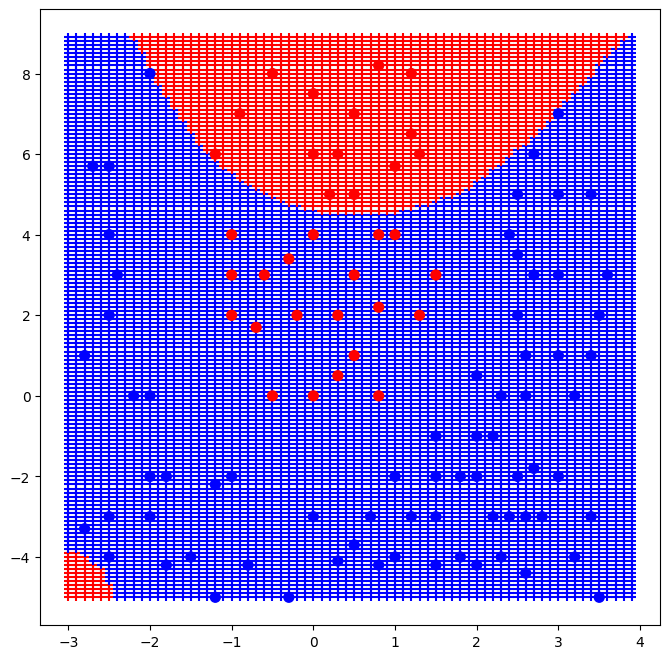

In [ ]:
draw_boundary(model, data_train, -3, 4, -5, 9)